# Data exploration

In [87]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [88]:
DATA = pd.read_csv('preprocessed data.csv')
DATA

,name,description,categories
0,tungsten solder pick handle,solder pick picking molten solder making jewelry,"Arts, Crafts & Sewing"
1,write right screen protector sony tc,screen need protect screen expensive little ga...,Cell Phones & Accessories
2,casio men dbc databank digital watch disconti...,bringing precision glance casio men databank d...,"Clothing, Shoes & Jewelry"
3,factoryreconditioned dewalt dwkr heavyduty am...,factoryreconditioned dewalt dwkr heavyduty am...,Tools & Home Improvement
4,energizer light,twoway light feature bright flashlight beam ad...,Health & Personal Care
...,...,...,...
44799,berkley trilene xl yard fishing line clear lb,smooth casting berkley trilene xl fishing line...,Sports & Outdoors
44800,badger airbrush company basic spray gun set,easy use top quality spray gun beginner spray ...,"Arts, Crafts & Sewing"
44801,fimo soft polymer clay ounces tropical green,fimo soft polymer clay easier use making perfe...,"Arts, Crafts & Sewing"
44802,wilton icing color oz rose petal,icing color plastic bottle contains ounce ici...,Grocery & Gourmet Food


# Combine the two columns name and description to have one text with more informations

In [89]:
#Create dataframe
column_names = ['NameDescription','categories']
df = pd.DataFrame(columns = column_names)

df.NameDescription = DATA['name']+' '+DATA['description']

df.categories = DATA.categories

In [90]:
df.to_csv(r'products_data1.csv', index=False)
# read csv file
products_data1=pd.read_csv('products_data1.csv')
products_data1

,NameDescription,categories
0,tungsten solder pick handle solder pick pickin...,"Arts, Crafts & Sewing"
1,write right screen protector sony tc screen n...,Cell Phones & Accessories
2,casio men dbc databank digital watch disconti...,"Clothing, Shoes & Jewelry"
3,factoryreconditioned dewalt dwkr heavyduty am...,Tools & Home Improvement
4,energizer light twoway light feature bright ...,Health & Personal Care
...,...,...
44799,berkley trilene xl yard fishing line clear l...,Sports & Outdoors
44800,badger airbrush company basic spray gun set ea...,"Arts, Crafts & Sewing"
44801,fimo soft polymer clay ounces tropical green ...,"Arts, Crafts & Sewing"
44802,wilton icing color oz rose petal icing color ...,Grocery & Gourmet Food


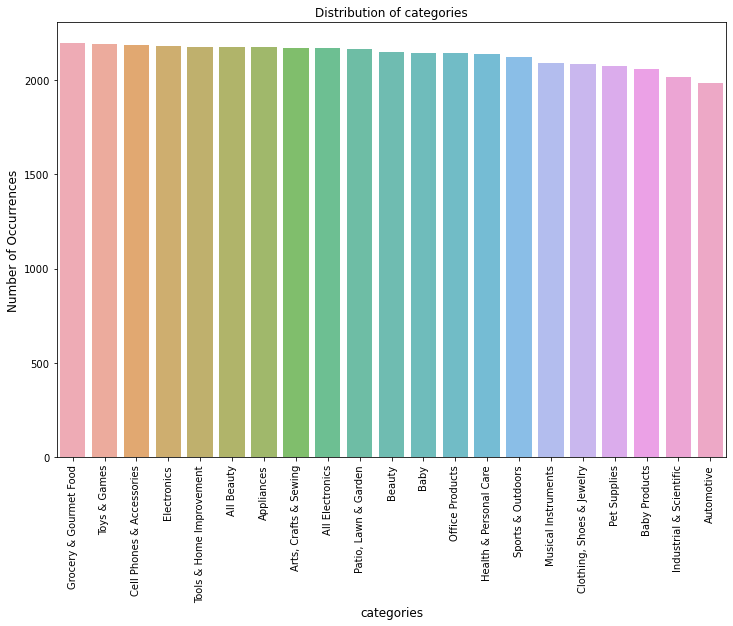

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

cnt_pro = products_data1['categories'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('categories', fontsize=12)
plt.title("Distribution of categories")
plt.xticks(rotation=90)
plt.show();

In [92]:
import plotly.express as px
fig = px.pie(products_data1, names='categories', title ='Pie chart of different categories')
fig.show()

We observe that our data is balanced, it's aproximately around 4.80%

<AxesSubplot:>

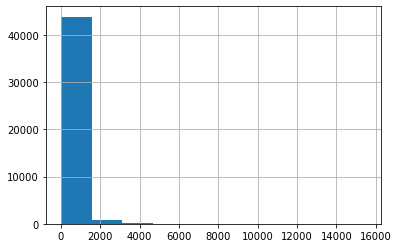

In [93]:
products_data1.NameDescription.str.len().hist()

We can see that the most NameDescription have a range of 0 to a proximately 1500 characters, while very few NameDescription have 2000 or more characters.

In [94]:
import itertools
from nltk.tokenize import word_tokenize


In [95]:
l=[]
for i in range(len(products_data1)):
    l.append((word_tokenize(str(products_data1['NameDescription'][i]))))
    

In [96]:
from collections import Counter
words_collection = Counter(list(itertools.chain.from_iterable(l)))
freq_word_df = pd.DataFrame(words_collection.most_common(20))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,inch,11947
1,x,9809
2,feature,9481
3,use,9045
4,phone,8174
5,color,7504
6,easy,6965
7,one,6917
8,also,6876
9,product,6667


The figure above shows the most frequently words in our data

In [97]:
# Visualizing data into wordclouds
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    # Combine all NameCategories
    
    combined_data = " ".join(map(str,[text for text in df[df.categories==category]['NameDescription']]))
    
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_data))
    plt.title('{} Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

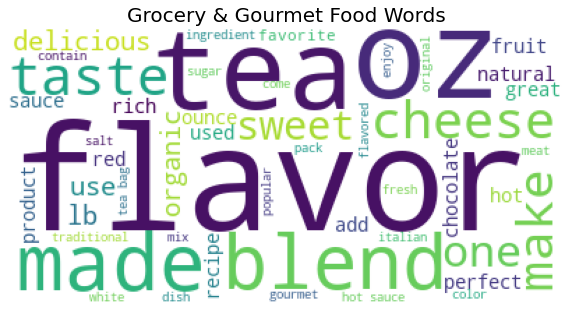

In [98]:
# rocery & Gourmet Food words
wordcount_gen(products_data1, 'Grocery & Gourmet Food')

The figure above shows the words used to describe 'Grocery & Gourmet Food' category. we can see that the most used words here are flavor, tea, taste ...

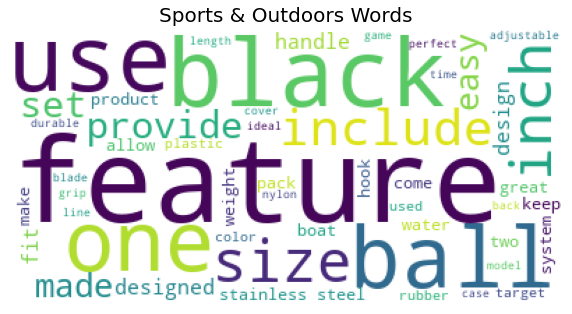

In [99]:
# Sports & Outdoors words
wordcount_gen(products_data1, 'Sports & Outdoors')

The figure above shows the words used to describe 'Sports & Outdoors' category. we can observe that the most used words are feature, ball, black, size...